In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import functools
%matplotlib inline

In [2]:
forest_5_5  = nx.read_edgelist("./SAN-royal+forest-5-5-EL.csv",  delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
forest_5_10 = nx.read_edgelist("./SAN-royal+forest-5-10-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
forest_10_5 = nx.read_edgelist("./SAN-royal+forest-10-5-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
forest_10_8 = nx.read_edgelist("./SAN-royal+forest-10-8-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])


In [3]:
forest_5_5_na = pd.read_csv("./SAN-royal+forest-5-5-NA.csv", delimiter="\t")

forest_5_10_na = pd.read_csv("./SAN-royal+forest-5-10-NA.csv", delimiter="\t")

forest_10_5_na = pd.read_csv("./SAN-royal+forest-10-5-NA.csv", delimiter="\t")

forest_10_8_na = pd.read_csv("./SAN-royal+forest-10-8-NA.csv", delimiter="\t")

In [4]:
# Assign node atrributes to nodes in the graph
def addAttributes(graph, na):
    labels = na.columns
    iter = 0

    for ID in na[labels[0]]:

        for feature in labels:
            cat = na[feature][iter]

            if type(cat) is str and not cat != None:
                graph.node[ID][feature] = cat

            elif (not type(cat) is float) or not math.isnan(cat):
                graph.node[ID][feature] = cat

        iter += 1

In [5]:
# Remove nodes created from edges leading out of the graph (next level of depth)
def removeFakeNode(graph, na):
    gNodes  = graph.nodes()
    naNodes = list(na[na.columns[0]])
    
    fakeNodes = list(set(gNodes) - set(naNodes))
    graph.remove_nodes_from(fakeNodes)
    print(len(fakeNodes))

In [6]:
addAttributes(forest_5_5, forest_5_5_na)
addAttributes(forest_5_10, forest_5_10_na)
addAttributes(forest_10_5, forest_10_5_na)
addAttributes(forest_10_8, forest_10_8_na)
removeFakeNode(forest_5_5, forest_5_5_na)
removeFakeNode(forest_5_10, forest_5_10_na)
removeFakeNode(forest_10_5, forest_10_5_na)
removeFakeNode(forest_10_8, forest_10_8_na)

0
0
0
49641


In [7]:
print(forest_5_5.number_of_nodes(), forest_5_5.number_of_edges())
print(forest_5_10.number_of_nodes(), forest_5_10.number_of_edges())
print(forest_10_5.number_of_nodes(), forest_10_5.number_of_edges())
print(forest_10_8.number_of_nodes(), forest_10_8.number_of_edges())

42 115
1972 5330
1279 2630
31802 230719


## In Degree Analysis

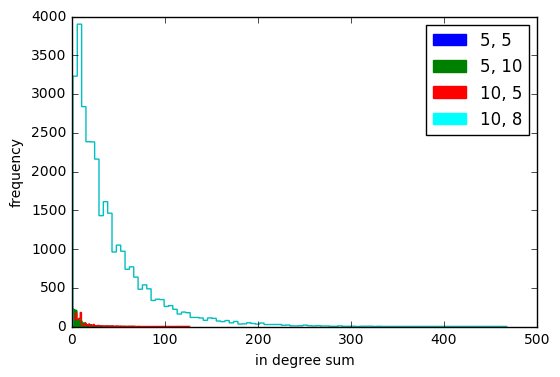

In [8]:
in_degrees_forest_5_5 = forest_5_5.in_degree(weight="rank")
in_degrees_forest_5_10 = forest_5_10.in_degree(weight="rank")
in_degrees_forest_10_5 = forest_10_5.in_degree(weight="rank")
in_degrees_forest_10_8 = forest_10_8.in_degree(weight="rank")

    
_ = plt.hist(list(in_degrees_forest_5_5.values()), bins=100, histtype='step')
_ = plt.hist(list(in_degrees_forest_5_10.values()), bins=100, histtype='step')
_ = plt.hist(list(in_degrees_forest_10_5.values()), bins=100, histtype='step')
_ = plt.hist(list(in_degrees_forest_10_8.values()), bins=100, histtype='step')

patch55  = mpatches.Patch(color="blue", label="5, 5")
patch510 = mpatches.Patch(color="green", label="5, 10")
patch105 = mpatches.Patch(color="red", label="10, 5")
patch108 = mpatches.Patch(color="cyan", label="10, 8")

plt.ylabel("frequency")
plt.xlabel("in degree sum")
plt.legend(handles=[patch55, patch510, patch105, patch108])

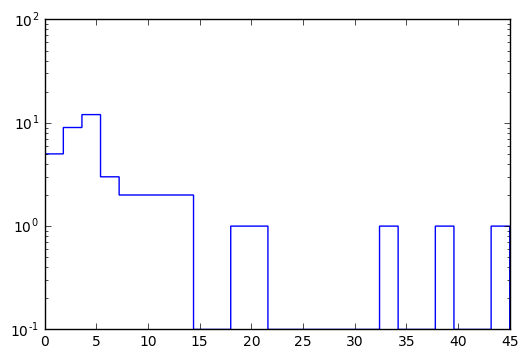

In [9]:
_ = plt.hist(list(in_degrees_forest_5_5.values()), bins=25, histtype='step', log=True)

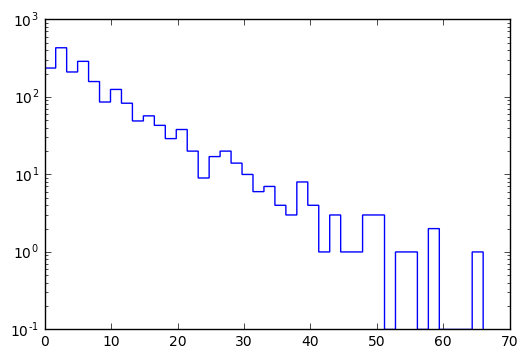

In [10]:
_ = plt.hist(list(in_degrees_forest_5_10.values()), bins=40, histtype='step', log=True)

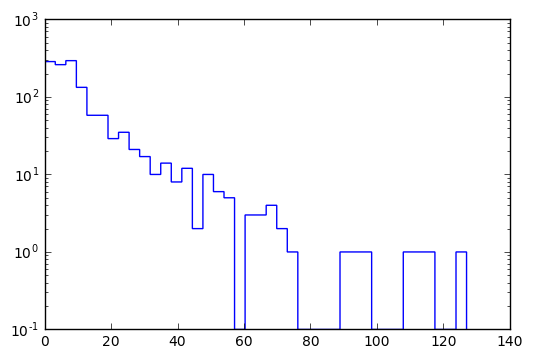

In [11]:
_ = plt.hist(list(in_degrees_forest_10_5.values()), bins=40, histtype='step', log=True)

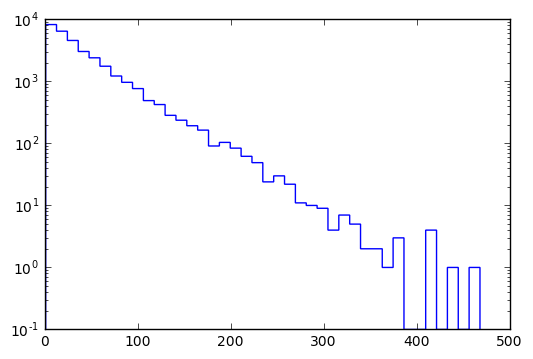

In [12]:
_ = plt.hist(list(in_degrees_forest_10_8.values()), bins=40, histtype='step', log=True)

Observation: In-degree seems to decay exponentially.

^check with log graph

drop off at 5 or 10 because leaf nodes only have 1 in-edge always with weight 1->5 or 10

In [13]:
# pop = []
# fol = []
# num = 0
# for k,v in in_degrees_forest_5_5.items():
#     if v > 40:
# #         print(forest_5_5.node[k])
# #         print("\n")
#         pop.append(forest_5_5.node[k]["popularity"])
#         fol.append(forest_5_5.node[k]["followers"])
#         num += 1
# for k,v in in_degrees_forest_5_10.items():
#     if v > 50:
# #         print(forest_5_10.node[k])
# #         print("\n")
#         pop.append(forest_5_10.node[k]["popularity"])
#         fol.append(forest_5_10.node[k]["followers"])
#         num += 1
# for k,v in in_degrees_forest_10_5.items():
#     if v > 150:
# #         print(forest_10_5.node[k])
# #         print("\n")
#         pop.append(forest_10_5.node[k]["popularity"])
#         fol.append(forest_10_5.node[k]["followers"])
#         num += 1
        
# print(sum(pop)/len(pop))
# print(sum(fol)/len(fol))


In [14]:
def topInDegreeAvgs(graph, pct):
    in_degrees = graph.in_degree(weight="rank")
    topPop = []
    topFol = []
    avgPop = []
    avgFol = []
    num = 0
    
    for k in in_degrees.keys():
        avgPop.append(int(graph.node[k]['popularity']))
        if(not graph.node[k]['followers'] == "null"):
            avgFol.append(int(graph.node[k]['followers']))
            
    avgPop.sort()
    avgFol.sort()
    topPop = avgPop[int(len(avgPop) * pct) : int(len(avgPop))]
    topFol = avgFol[int(len(avgFol) * pct) : int(len(avgFol))]
    return [sum(avgPop)/len(avgPop), sum(topPop)/len(topPop), sum(avgFol)/len(avgFol), sum(topFol)/len(topFol)]

def topInDegreeLists(graph, pct):
    in_degrees = graph.in_degree(weight="rank")
    topPop = []
    topFol = []
    avgPop = []
    avgFol = []
    num = 0
    
    for k in in_degrees.keys():
        avgPop.append(int(graph.node[k]['popularity']))
        if(not graph.node[k]['followers'] == "null"):
            avgFol.append(int(graph.node[k]['followers']))
            
    avgPop.sort()
    avgFol.sort()
    topPop = avgPop[int(len(avgPop) * pct) : int(len(avgPop))]
    topFol = avgFol[int(len(avgFol) * pct) : int(len(avgFol))]
    return [avgPop, topPop, avgFol, topFol]

tida55  = topInDegreeAvgs(forest_5_5, .90)
tida510 = topInDegreeAvgs(forest_5_10, .90)
tida105 = topInDegreeAvgs(forest_10_5, .90)
tida108 = topInDegreeAvgs(forest_10_8, .90)

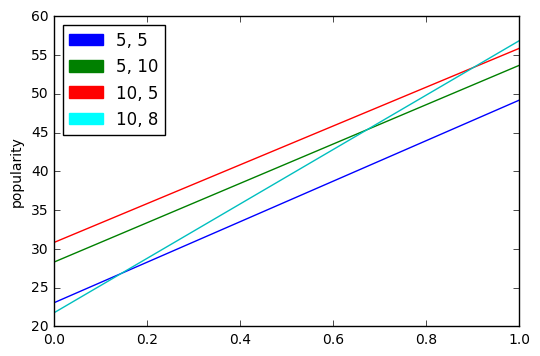

In [15]:
_ = plt.plot(tida55[0:2])
_ = plt.plot(tida510[0:2])
_ = plt.plot(tida105[0:2])
_ = plt.plot(tida108[0:2])
patch55  = mpatches.Patch(color="blue", label="5, 5")
patch510 = mpatches.Patch(color="green", label="5, 10")
patch105 = mpatches.Patch(color="red", label="10, 5")
patch108 = mpatches.Patch(color="cyan", label="10, 8")

plt.ylabel("popularity")
plt.legend(handles=[patch55, patch510, patch105, patch108], loc=2)

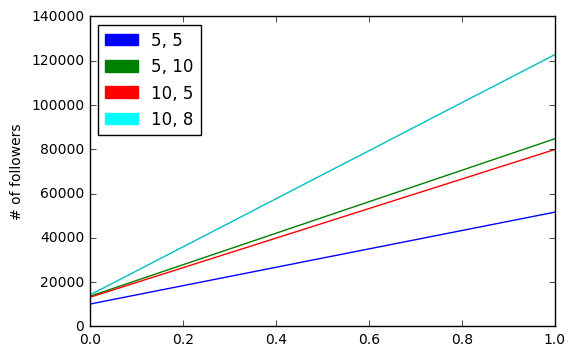

In [16]:
_ = plt.plot(tida55[2:4])
_ = plt.plot(tida510[2:4])
_ = plt.plot(tida105[2:4])
_ = plt.plot(tida108[2:4])
patch55  = mpatches.Patch(color="blue", label="5, 5")
patch510 = mpatches.Patch(color="green", label="5, 10")
patch105 = mpatches.Patch(color="red", label="10, 5")
patch108 = mpatches.Patch(color="cyan", label="10, 8")

plt.ylabel("# of followers")
plt.legend(handles=[patch55, patch510, patch105, patch108], loc=2)

In [17]:
f55idl = topInDegreeLists(forest_5_5, .90)
f510idl = topInDegreeLists(forest_5_10, .90)
f105idl = topInDegreeLists(forest_10_5, .90)
f108idl = topInDegreeLists(forest_10_8, .90)

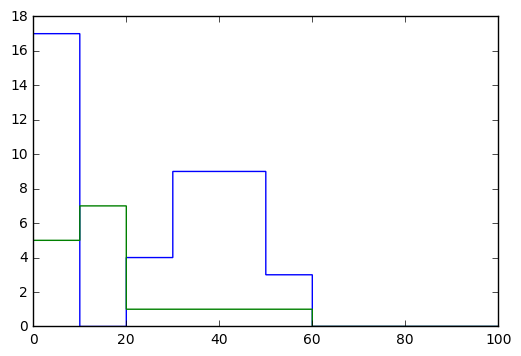

In [18]:
_ = plt.hist(f55idl[0], range=(0,100), histtype="step")
_ = plt.hist(f55idl[2], range=(0,100), histtype="step")

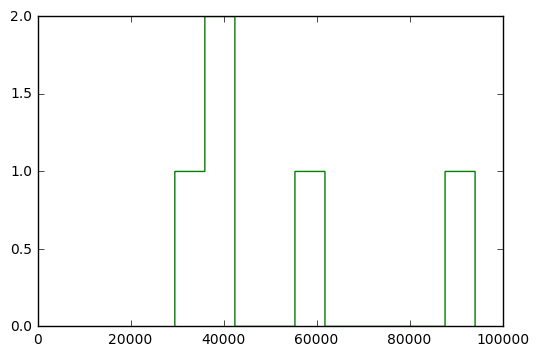

In [19]:
_ = plt.hist(f55idl[1], histtype="step")
_ = plt.hist(f55idl[3], histtype="step")

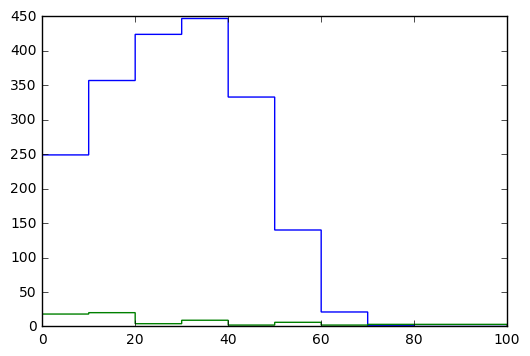

In [20]:
_ = plt.hist(f510idl[0], range=(0,100), histtype="step")
_ = plt.hist(f510idl[2], range=(0,100), histtype="step")

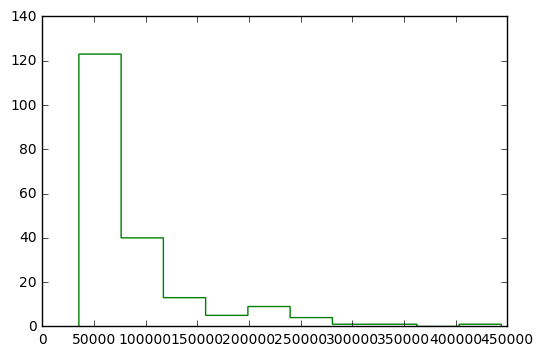

In [21]:
_ = plt.hist(f510idl[1], histtype="step")
_ = plt.hist(f510idl[3], histtype="step")

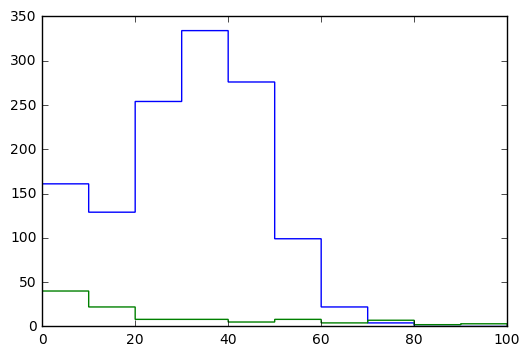

In [22]:
_ = plt.hist(f105idl[0], range=(0,100), histtype="step")
_ = plt.hist(f105idl[2], range=(0,100), histtype="step")

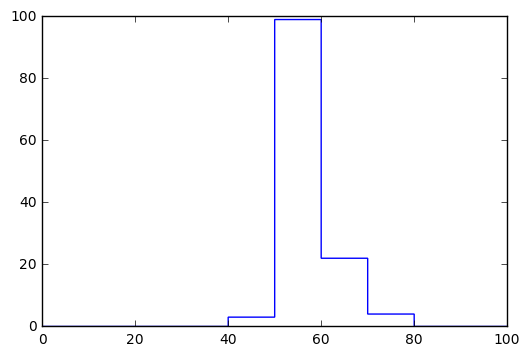

In [23]:
_ = plt.hist(f105idl[1], range=(0,100), histtype="step")
# _ = plt.hist(f105idl[3], range=(0,100), histtype="step")

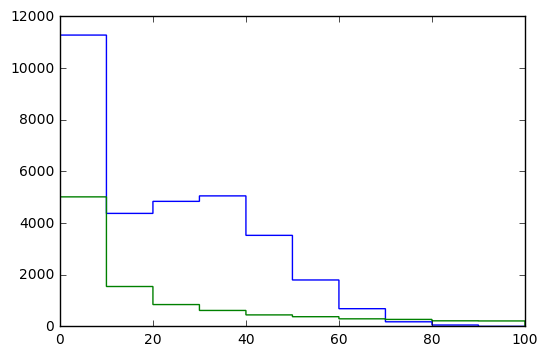

In [24]:
_ = plt.hist(f108idl[0], range=(0,100), histtype="step")
_ = plt.hist(f108idl[2], range=(0,100), histtype="step")

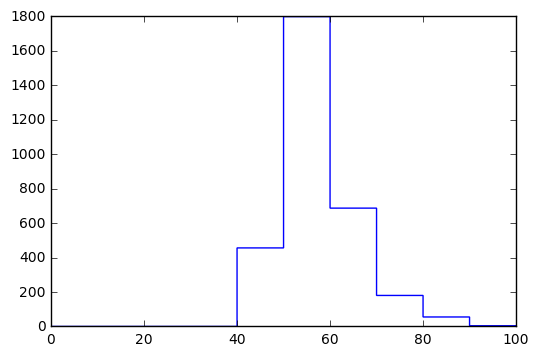

In [25]:
_ = plt.hist(f108idl[1], range=(0,100), histtype="step")
# _ = plt.hist(f108idl[3], range=(0,100), histtype="step")

Observation: the artist with the highest in degree value are significantly more popular than the average artist in the graph

## Genre Analysis

In [26]:
def genreSimilarity(gA, gB):
#     jaccard index
    total = len(list(set(gA) | set(gB)))
    same  = len(list(set(gA) & set(gB)))
    if total == 0:
        return 0
    return same/total

def genreSimilarityBinary(gA, gB):
    if len(list(set(gA) & set(gB))) > 0:
        return 1
    return 0

def genreSimilarityBinaryNum(sim):
    matches = 0
    for v in sim:
        if v == 1:
            matches += 1
    return matches

def genreMatchingNums(graph):
    matchingNum = genreSimilarityBinaryNum(similarity(graph, 1))
    nonmatchingNum = graph.number_of_edges() - matchingNum
    matchingPercent = matchingNum/(matchingNum+nonmatchingNum)
    return [matchingNum, nonmatchingNum, matchingPercent]

def getGenres(node):
    genres = []
    for g in ["genre1", "genre2", "genre3", "genre4", "genre5"]:
        if g in node:
            genres.append(node[g])
    return genres

In [27]:
def similarity(g, similarity):
    sim = []
    for s,t,d in g.edges(data=True):
        gS = getGenres(g.node[s])
        gT = getGenres(g.node[t])
        if similarity == 0:
            sim.append(genreSimilarity(gS, gT))
        else:
            sim.append(genreSimilarityBinary(gS, gT))
    return sim

Matching genre:106
Non-matching genre:9
Matching genre percent:0.9217391304347826


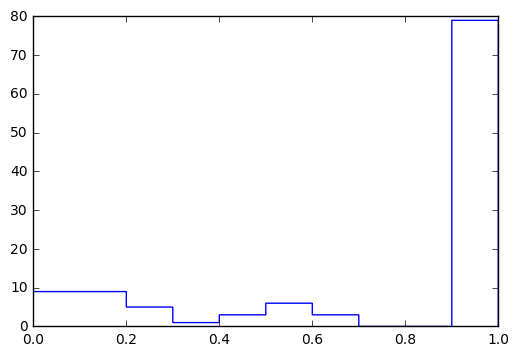

In [28]:
_ = plt.hist(similarity(forest_5_5, 0), histtype="step")
f55m = genreMatchingNums(forest_5_5)
print("Matching genre:" + str(f55m[0]))
print("Non-matching genre:" + str(f55m[1]))
print("Matching genre percent:" + str(f55m[2]))

Matching genre:4307
Non-matching genre:1023
Matching genre percent:0.8080675422138837


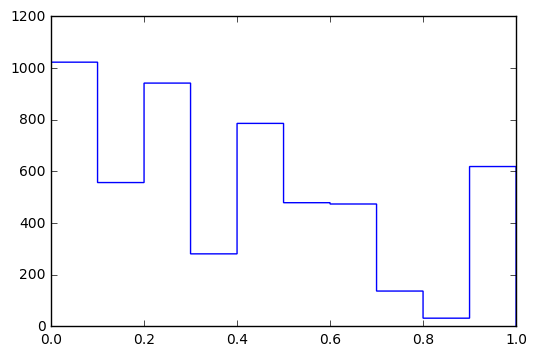

In [29]:
_ = plt.hist(similarity(forest_5_10, 0), histtype="step")
f510m = genreMatchingNums(forest_5_10)
print("Matching genre:" + str(f510m[0]))
print("Non-matching genre:" + str(f510m[1]))
print("Matching genre percent:" + str(f510m[2]))

Matching genre:1716
Non-matching genre:914
Matching genre percent:0.6524714828897339


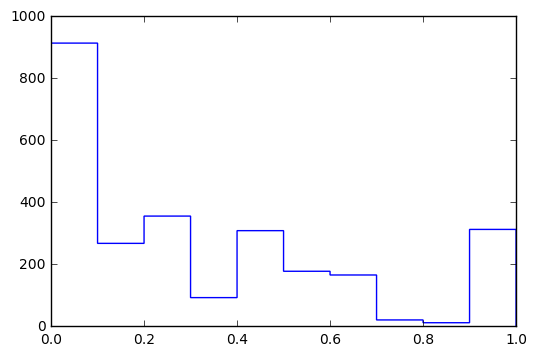

In [30]:
_ = plt.hist(similarity(forest_10_5, 0), histtype="step")
f105m = genreMatchingNums(forest_10_5)
print("Matching genre:" + str(f105m[0]))
print("Non-matching genre:" + str(f105m[1]))
print("Matching genre percent:" + str(f105m[2]))

Matching genre:126511
Non-matching genre:104208
Matching genre percent:0.5483336872992688


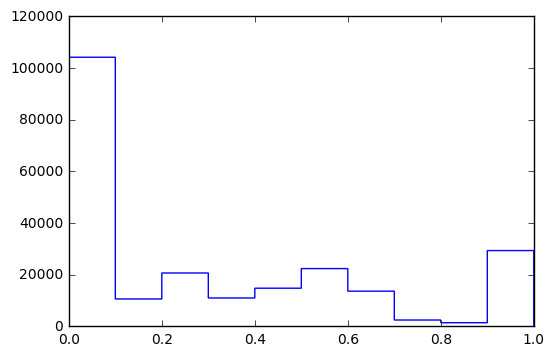

In [31]:
_ = plt.hist(similarity(forest_10_8, 0), histtype="step")
f108m = genreMatchingNums(forest_10_8)
print("Matching genre:" + str(f108m[0]))
print("Non-matching genre:" + str(f108m[1]))
print("Matching genre percent:" + str(f108m[2]))

5,  5 Matching genre percent:0.9217391304347826
5, 10 Matching genre percent:0.8080675422138837
10, 5 Matching genre percent:0.6524714828897339
10, 8 Matching genre percent:0.5483336872992688


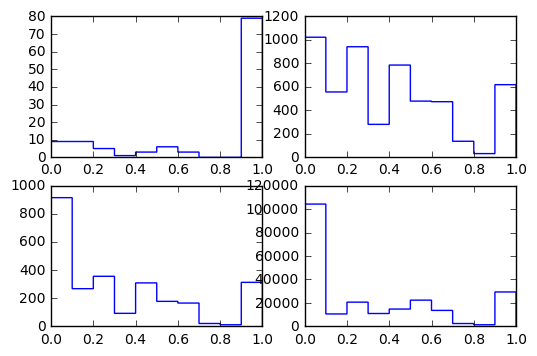

In [32]:
plt.subplot(221)
plt.hist(similarity(forest_5_5, 0), histtype="step")
f55m = genreMatchingNums(forest_5_5)
print("5,  5 Matching genre percent:" + str(f55m[2]))

plt.subplot(222)
plt.hist(similarity(forest_5_10, 0), histtype="step")
f510m = genreMatchingNums(forest_5_10)
print("5, 10 Matching genre percent:" + str(f510m[2]))

plt.subplot(223)
plt.hist(similarity(forest_10_5, 0), histtype="step")
f105m = genreMatchingNums(forest_10_5)
print("10, 5 Matching genre percent:" + str(f105m[2]))

plt.subplot(224)
plt.hist(similarity(forest_10_8, 0), histtype="step")
f108m = genreMatchingNums(forest_10_8)
print("10, 8 Matching genre percent:" + str(f108m[2]))

In [33]:
def genreList(graph):
    genres = []
    labels = ["genre1", "genre2", "genre3", "genre4", "genre5"]
    
    for n,d in graph.nodes_iter(data=True):
        for l in labels:
            if l in d:
                genres.append(d[l])
    return genres

def genreShuffle(graph):
    genres = genreList(graph)
    random.shuffle(genres)
    return genres

In [34]:
def genreReassign(graph, genres):
    genresLen = len(genres)
    iter = 0

    for ID in graph.nodes():
        for g in ["genre1", "genre2", "genre3", "genre4", "genre5"]:
            if g in graph.node[ID] and iter < genresLen:
                graph.node[ID][g] = genres[iter]
            iter += 1

In [35]:
forest_5_5_shuf = forest_5_5.copy()
genreReassign(forest_5_5_shuf, genreShuffle(forest_5_5_shuf))

forest_5_10_shuf = forest_5_10.copy()
genreReassign(forest_5_10_shuf, genreShuffle(forest_5_10_shuf))

forest_10_5_shuf = forest_10_5.copy()
genreReassign(forest_10_5_shuf, genreShuffle(forest_10_5_shuf))

forest_10_8_shuf = forest_10_8.copy()
genreReassign(forest_10_8_shuf, genreShuffle(forest_10_8_shuf))


Shuffled Matching genre:32
Shuffled Non-matching genre:83
Shuffled Matching genre percent:0.2782608695652174


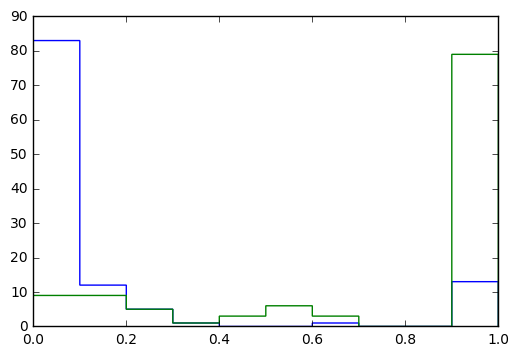

In [36]:
_ = plt.hist(similarity(forest_5_5_shuf, 0), histtype="step")
_ = plt.hist(similarity(forest_5_5, 0), histtype="step")
f55ms = genreMatchingNums(forest_5_5_shuf)
print("Shuffled Matching genre:" + str(f55ms[0]))
print("Shuffled Non-matching genre:" + str(f55ms[1]))
print("Shuffled Matching genre percent:" + str(f55ms[2]))

Shuffled Matching genre:1120
Shuffled Non-matching genre:4210
Shuffled Matching genre percent:0.2101313320825516


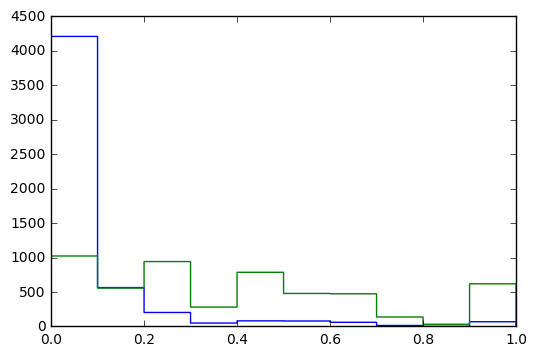

In [37]:
_ = plt.hist(similarity(forest_5_10_shuf, 0), histtype="step")
_ = plt.hist(similarity(forest_5_10, 0), histtype="step")
f510ms = genreMatchingNums(forest_5_10_shuf)
print("Shuffled Matching genre:" + str(f510ms[0]))
print("Shuffled Non-matching genre:" + str(f510ms[1]))
print("Shuffled Matching genre percent:" + str(f510ms[2]))

Shuffled Matching genre:581
Shuffled Non-matching genre:2049
Shuffled Matching genre percent:0.2209125475285171


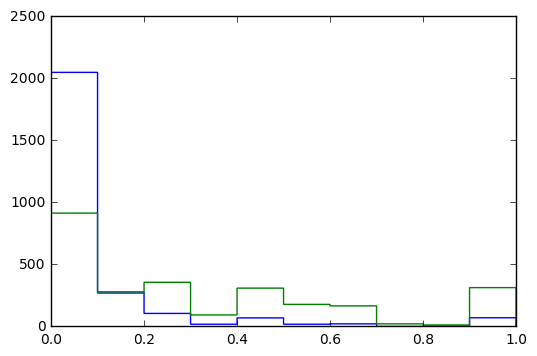

In [38]:
_ = plt.hist(similarity(forest_10_5_shuf, 0), histtype="step")
_ = plt.hist(similarity(forest_10_5, 0), histtype="step")
f105ms = genreMatchingNums(forest_10_5_shuf)
print("Shuffled Matching genre:" + str(f105ms[0]))
print("Shuffled Non-matching genre:" + str(f105ms[1]))
print("Shuffled Matching genre percent:" + str(f105ms[2]))

Shuffled Matching genre:62593
Shuffled Non-matching genre:168126
Shuffled Matching genre percent:0.27129538529553265


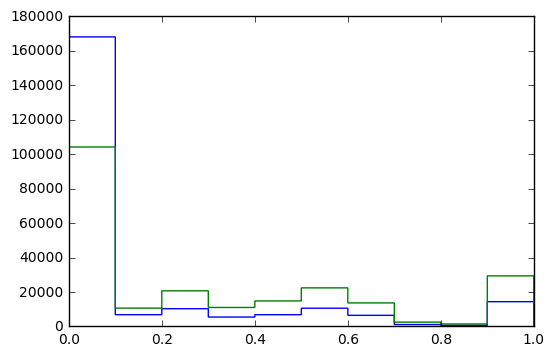

In [39]:
_ = plt.hist(similarity(forest_10_8_shuf, 0), histtype="step")
_ = plt.hist(similarity(forest_10_8, 0), histtype="step")
f108ms = genreMatchingNums(forest_10_8_shuf)
print("Shuffled Matching genre:" + str(f108ms[0]))
print("Shuffled Non-matching genre:" + str(f108ms[1]))
print("Shuffled Matching genre percent:" + str(f108ms[2]))

5,  5 Shuffled Matching genre percent:0.2782608695652174
5, 10 Shuffled Matching genre percent:0.2101313320825516
10, 5 Shuffled Matching genre percent:0.2209125475285171
10, 8 Shuffled Matching genre percent:0.27129538529553265


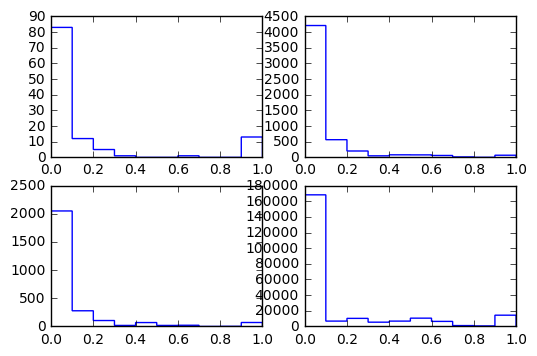

In [40]:
plt.subplot(221)
plt.hist(similarity(forest_5_5_shuf, 0), histtype="step")
f55ms = genreMatchingNums(forest_5_5_shuf)
print("5,  5 Shuffled Matching genre percent:" + str(f55ms[2]))

plt.subplot(222)
plt.hist(similarity(forest_5_10_shuf, 0), histtype="step")
f510ms = genreMatchingNums(forest_5_10_shuf)
print("5, 10 Shuffled Matching genre percent:" + str(f510ms[2]))

plt.subplot(223)
plt.hist(similarity(forest_10_5_shuf, 0), histtype="step")
f105ms = genreMatchingNums(forest_10_5_shuf)
print("10, 5 Shuffled Matching genre percent:" + str(f105ms[2]))

plt.subplot(224)
plt.hist(similarity(forest_10_8_shuf, 0), histtype="step")
f108ms = genreMatchingNums(forest_10_8_shuf)
print("10, 8 Shuffled Matching genre percent:" + str(f108ms[2]))

Observation: While genre doesn't seem to have a strong correclation with edges, it definitely has some significant influence.

## Clustering Analysis

In [41]:
def clustering(graph, node):
    existing = 0
    nbs = graph.neighbors(node)
    for nb in nbs:
        for nb2 in graph.neighbors(nb):
            if nb2 in nbs:
                existing += 1
    
    possible = len(nbs)*(len(nbs) - 1)
    if possible != 0:
        return existing/possible
    return 0

In [42]:
def clusteringCoef(graph):
    cvals = []
    for n in graph.nodes():
        cvals.append(clustering(graph, n))
    return cvals

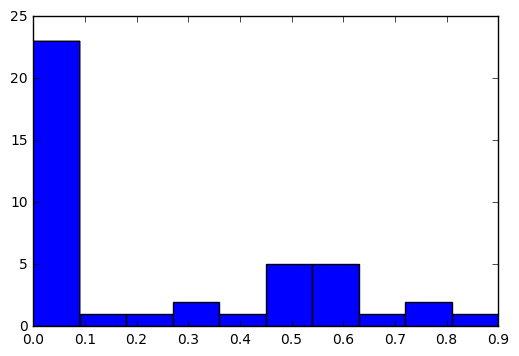

In [43]:
_ = plt.hist(clusteringCoef(forest_5_5))

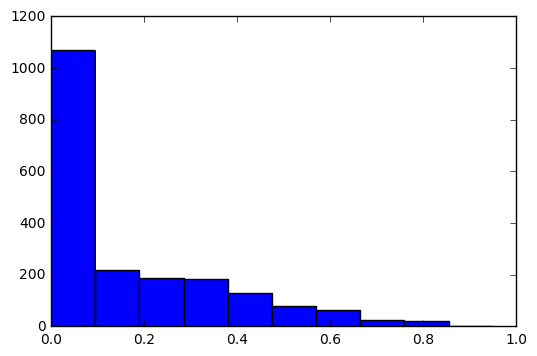

In [44]:
_ = plt.hist(clusteringCoef(forest_5_10))

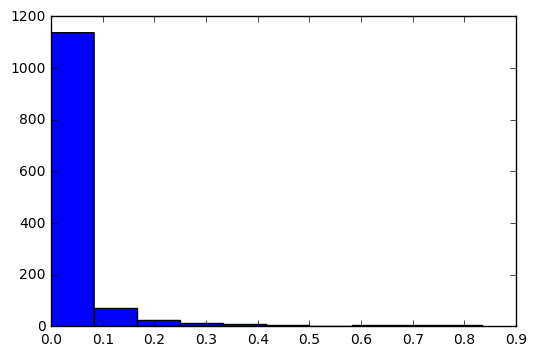

In [45]:
_ = plt.hist(clusteringCoef(forest_10_5))

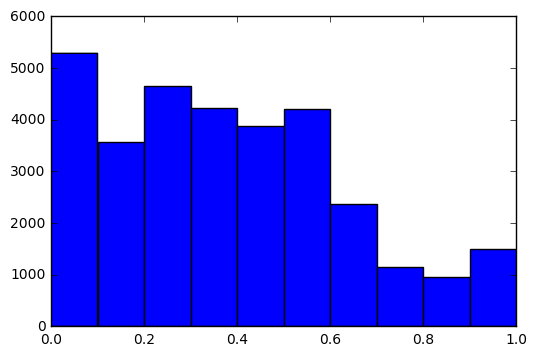

In [46]:
_ = plt.hist(clusteringCoef(forest_10_8))

In [47]:
ccf55 = clusteringCoef(forest_5_5)
print(sum(ccf55)/len(ccf55))

ccf510 = clusteringCoef(forest_5_10)
print(sum(ccf510)/len(ccf510))

ccf105 = clusteringCoef(forest_10_5)
print(sum(ccf105)/len(ccf105))

ccf108 = clusteringCoef(forest_10_8)
print(sum(ccf108)/len(ccf108))

0.23452380952380952
0.15223123732251528
0.030787941968551873
0.37475161290644554


In [48]:
apspforest55 = nx.all_pairs_shortest_path(forest_5_5)
apspforest510 = nx.all_pairs_shortest_path(forest_5_10)
apspforest105 = nx.all_pairs_shortest_path(forest_10_5)
# apspforest108 = nx.all_pairs_shortest_path(forest_10_8)

In [49]:
def apspLens(graph):
    apsp = nx.all_pairs_shortest_path(graph)
    apspLens = []

    for n in apsp:
        for p in apsp[n]:
            apspLens.append(len(apsp[n][p]))
    return apspLens


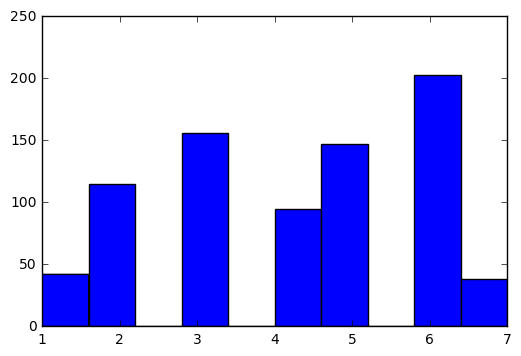

In [50]:
_ = plt.hist(apspLens(forest_5_5))

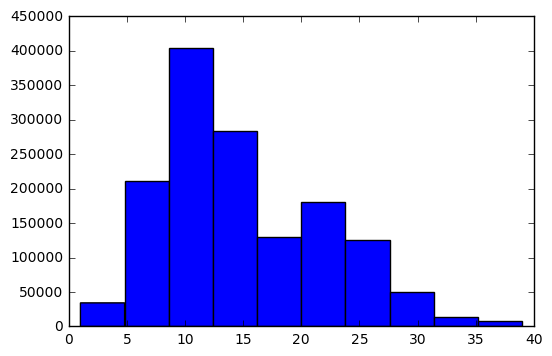

In [51]:
_ = plt.hist(apspLens(forest_5_10))

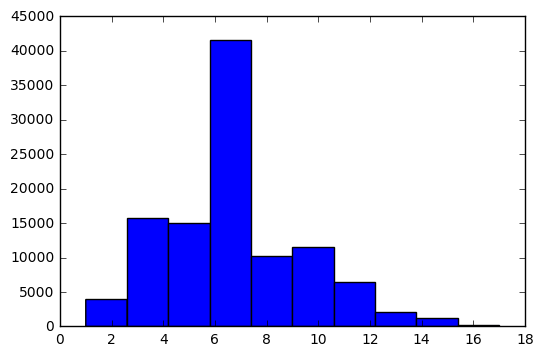

In [52]:
_ = plt.hist(apspLens(forest_10_5))

In [53]:
# _ = plt.hist(apspLens(forest_10_8))